In [93]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [94]:
data = pd.read_csv('titanic_data.csv')
test = pd.read_csv('titanic_data.csv')
data['train_test'] = 1
test['train_test'] = 0
test['Survived'] = np.NaN
all_data = pd.concat([data,test])
all_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype='object')

In [95]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


In [96]:
data["Age"] = data["Age"].fillna(data["Age"].median())
data["Embarked"].mode()
data["Embarked"] = data["Embarked"].fillna("S")

In [97]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
train_test       0
dtype: int64

In [98]:
# seperate the data into numeric and categorical
data_num = training[['Age','SibSp','Parch','Fare']]
data_cat = training[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

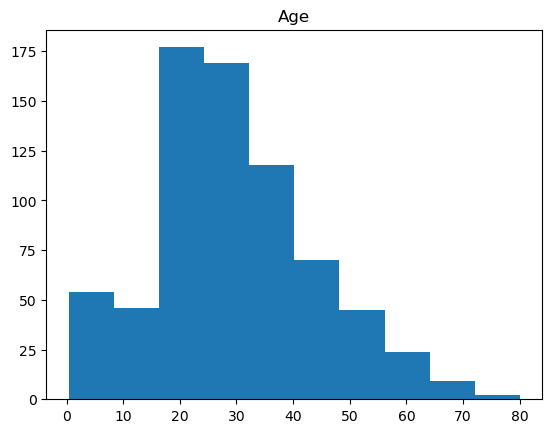

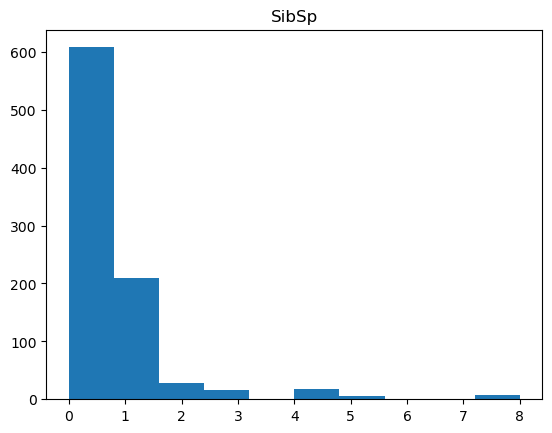

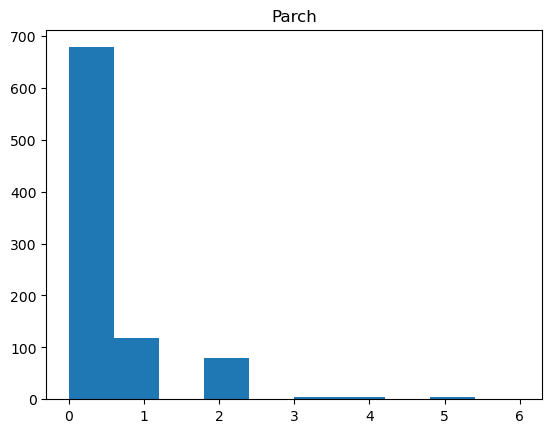

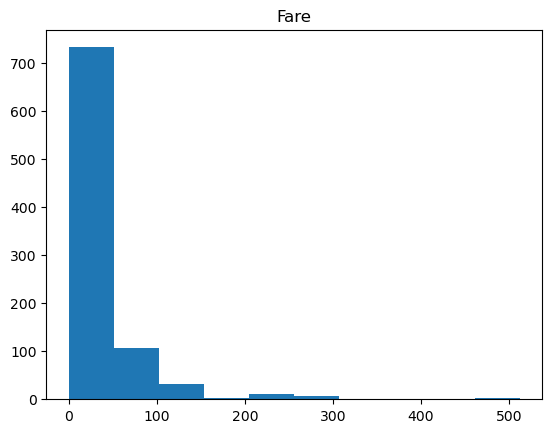

In [99]:
for i in data_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

<Axes: >

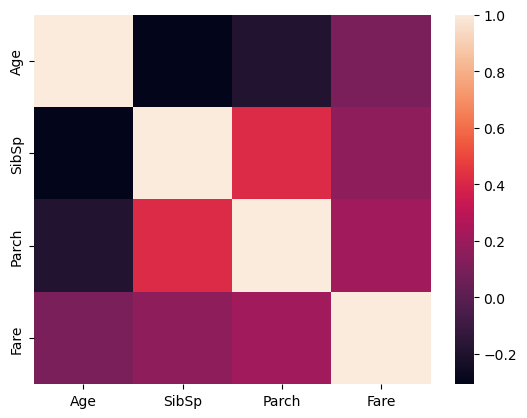

In [100]:
sns.heatmap(data_num.corr())

In [101]:
pd.pivot_table(data, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.028233,22.117887,0.329690,0.553734
1,28.291433,48.395408,0.464912,0.473684


### The inference we can draw from this table is

1. Survivors had an average age of 28, suggesting that younger individuals were more likely to survive.
2. Passengers who paid higher fares, potentially indicating first-class travelers, had a significantly higher survival rate, highlighting a socioeconomic disparity in survival chances.
3. Having parents onboard increased the likelihood of survival, possibly due to parents prioritizing their children's safety.
4. Conversely, children with siblings had a lower chance of survival, indicating that having siblings may have posed challenges during the evacuation process.

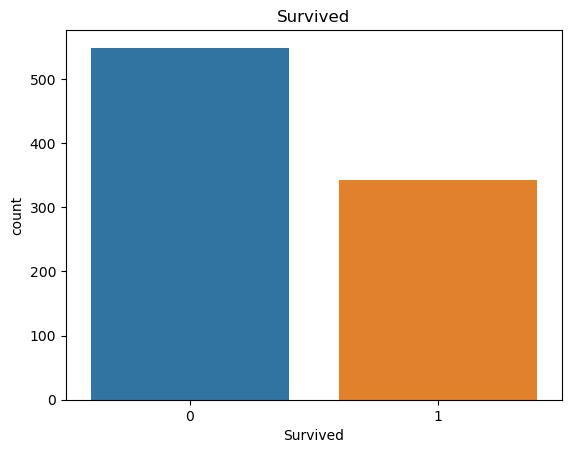

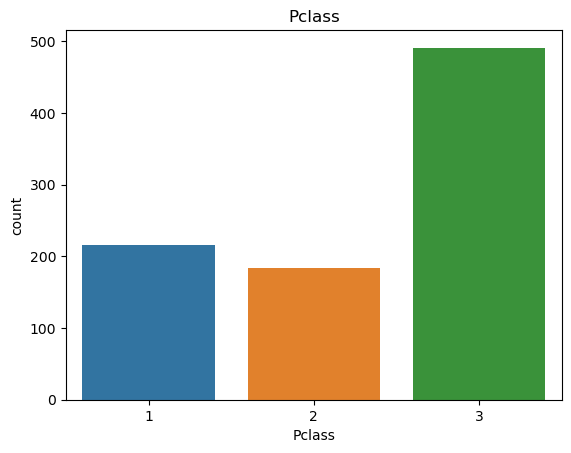

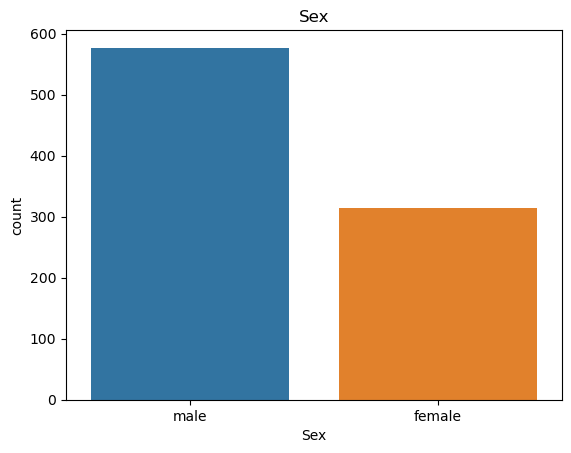

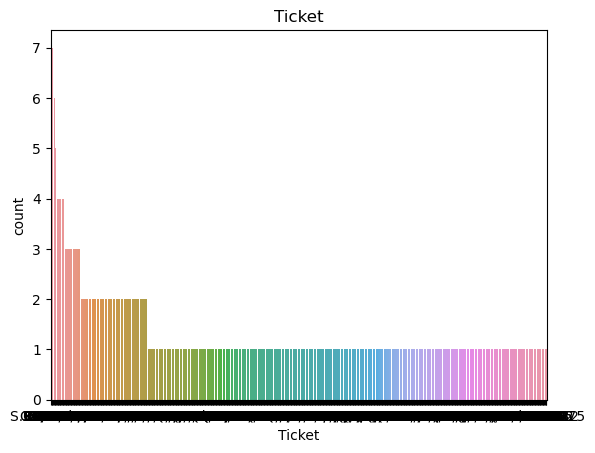

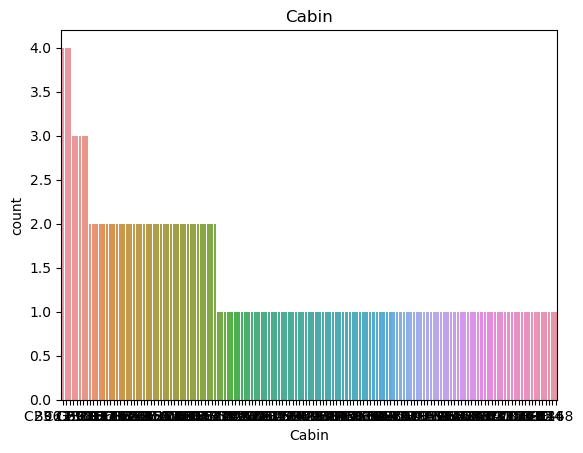

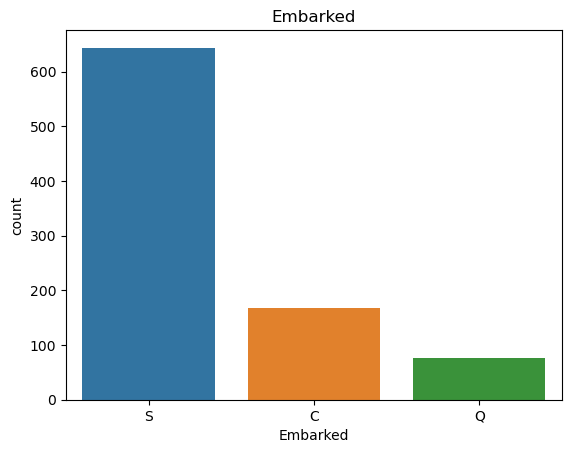

In [102]:
for i in data_cat.columns:
    sns.barplot(x=data_cat[i].value_counts().index, y=data_cat[i].value_counts()).set_title(i)
    plt.savefig(f'{i}_barplot.png') 
    plt.show()


### The Ticket and Cabin graphs appear cluttered and may require feature engineering for better clarity. Apart from that, key insights from the other graphs include:

1. Survived: A significant majority did not survive the shipwreck, with only around 300 people managing to survive.

2. Pclass: The majority of passengers held tickets for the 3rd class, indicating a higher number of individuals in the lower socioeconomic class.

3. Sex: There were approximately twice as many males as females on board the ship.

4. Embarked: The majority of passengers boarded the ship from Southampton, providing insights into the embarkation patterns.

In [103]:
print(pd.pivot_table(data, index = 'Survived', columns = 'Pclass',
                     values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(data, index = 'Survived', columns = 'Sex', 
                     values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(data, index = 'Survived', columns = 'Embarked', 
                     values = 'Ticket' ,aggfunc ='count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  219


In [104]:
data_cat.Cabin
data['cabin_multiple'] = data.Cabin.apply(lambda x: 0 if pd.isna(x) 
                                                    else len(x.split(' ')))
data['cabin_multiple'].value_counts()

cabin_multiple
0    687
1    180
2     16
3      6
4      2
Name: count, dtype: int64

In [105]:
pd.pivot_table(data, index = 'Survived', columns = 'cabin_multiple',
               values = 'Ticket' ,aggfunc ='count')

cabin_multiple,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


In [106]:
# n stands for null
# in this case we will treat null values like it's own category
data['cabin_adv'] = data.Cabin.apply(lambda x: str(x)[0])
#comparing survival rates by cabin
print(data.cabin_adv.value_counts())
pd.pivot_table(data,index='Survived',columns='cabin_adv', 
                        values = 'Name', aggfunc='count')

cabin_adv
n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: count, dtype: int64


cabin_adv,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


In [107]:
data['numeric_ticket'] = data.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
data['ticket_letters'] = data.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1])
                                            .replace('.','').replace('/','')
                                            .lower() if len(x.split(' ')[:-1]) >0 else 0)

In [108]:
data.Name.head(50)
data['name_title'] = data.Name.apply(lambda x: x.split(',')[1]
                                                        .split('.')[0].strip())
data['name_title'].value_counts()

name_title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

# 1. Construct a KNN Model for Survival Prediction

In [136]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

X = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
y = data['Survived']

In [137]:
X.loc[data["Sex"] == "male", "Sex"] = 1
X.loc[data["Sex"] == "female", "Sex"] = 2


In [138]:
data.isnull().sum()

PassengerId         0
Survived            0
Pclass              0
Name                0
Sex                 0
Age                 0
SibSp               0
Parch               0
Ticket              0
Fare                0
Cabin             687
Embarked            0
train_test          0
cabin_multiple      0
cabin_adv           0
numeric_ticket      0
ticket_letters      0
name_title          0
dtype: int64

In [139]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=42)
# Standardize the features
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)

In [140]:
X_test = sc.transform(X_test)
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score
acc = []
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    yhat = knn.predict(X_test)
    acc.append(accuracy_score(y_test,yhat))
    print("For k = ",i," : ",accuracy_score(y_test,yhat))

For k =  1  :  0.7821229050279329
For k =  2  :  0.7988826815642458
For k =  3  :  0.8044692737430168
For k =  4  :  0.8044692737430168
For k =  5  :  0.7988826815642458
For k =  6  :  0.8100558659217877
For k =  7  :  0.8044692737430168
For k =  8  :  0.7932960893854749
For k =  9  :  0.8100558659217877
For k =  10  :  0.7877094972067039
For k =  11  :  0.7988826815642458
For k =  12  :  0.7877094972067039
For k =  13  :  0.7988826815642458
For k =  14  :  0.7877094972067039
For k =  15  :  0.7877094972067039
For k =  16  :  0.770949720670391
For k =  17  :  0.7821229050279329
For k =  18  :  0.776536312849162
For k =  19  :  0.7821229050279329


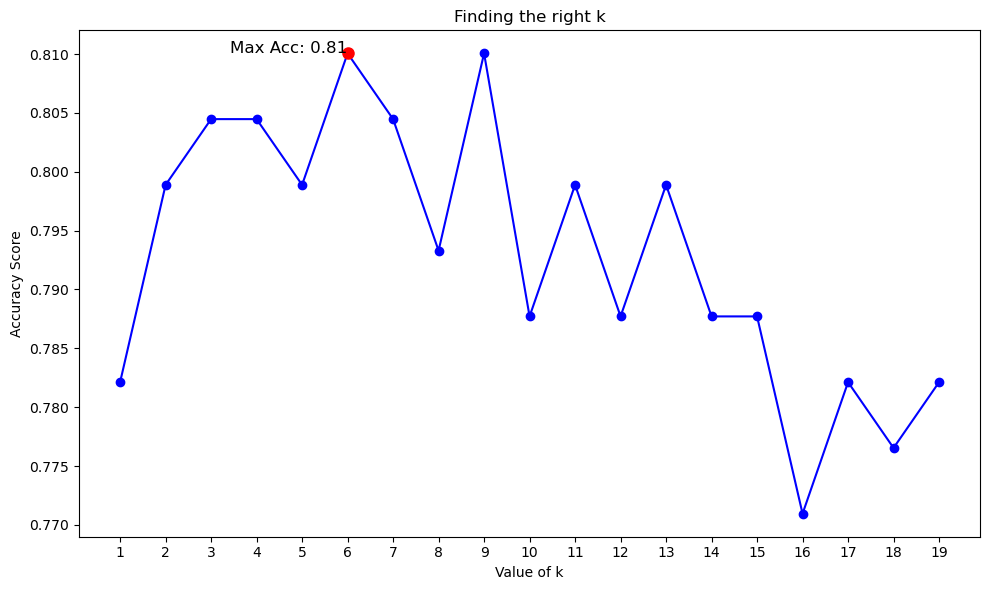

In [152]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(range(1, 20), acc, marker='o', color='b')
max_acc_index = acc.index(max(acc))
plt.plot(max_acc_index + 1, max(acc), marker='o', markersize=8, color='r')
plt.text(max_acc_index + 1, max(acc), f'Max Acc: {max(acc):.2f}', fontsize=12, ha='right')
plt.grid(False)
plt.xlabel('Value of k')
plt.ylabel('Accuracy Score')
plt.title('Finding the right k')
plt.xticks(range(1, 20))
plt.tight_layout()
plt.show()

# Interpretations:

1. Our optimal k-value turned out to be 14, like finding the perfect balance for your tea!
2. Testing our model, we achieved around 78% accuracy, which is pretty good. The small gap between training and testing scores means no overfitting worries.
3. The confusion matrix acts like a treasure map, highlighting where our model succeeded and where it stumbled. It correctly identified 86 "didn't survive" cases but missed 19, and it identified 55 "survived" cases but missed 19.
4. Seems like our model is better at identifying those who didn't make it, with higher precision for that group.
5. It's also better at spotting real "didn't survive" cases than "survived" ones, as shown by the higher recall.
6. The F1 score, our all-around performer, leans towards "didn't survive," suggesting better balance there.
7. While our model's performing decently, there's always room for improvement! We could fine-tune parameters, tweak features, or handle class imbalances for even better results. Just like adding sprinkles to your ice cream, there's always room for more!

# 2. Improve the model using grid search:

In [142]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'n_neighbors': [3, 5, 7, 9, 11], 'weights': ['uniform', 'distance']}

In [143]:
# Create KNN model
knn_model = KNeighborsClassifier()

In [144]:
# GridSearchCV
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [145]:
# Best parameters from grid search
best_params = grid_search.best_params_

In [146]:
# Refit the model with the best parameters
best_knn_model = grid_search.best_estimator_
best_knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [147]:
# Predictions on the test set
y_pred_best = best_knn_model.predict(X_test_scaled)

In [148]:
# Evaluate the model with best parameters
accuracy_best = accuracy_score(y_test, y_pred_best)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
class_report_best = classification_report(y_test, y_pred_best)

# Print the evaluation results
print("Accuracy:", accuracy_best)
print("Confusion Matrix:\n", conf_matrix_best)
print("Classification Report:\n", class_report_best)

Accuracy: 0.7877094972067039
Confusion Matrix:
 [[86 19]
 [19 55]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82       105
           1       0.74      0.74      0.74        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



# 3. K=1:

In [150]:
knn_model_k1 = KNeighborsClassifier(n_neighbors=1)
knn_model_k1.fit(X_train_scaled, y_train)
y_pred_k1_train = knn_model_k1.predict(X_train_scaled)
y_pred_k1_test = knn_model_k1.predict(X_test_scaled)
accuracy_k1_train = accuracy_score(y_train, y_pred_k1_train)
accuracy_k1_test = accuracy_score(y_test, y_pred_k1_test)
print(f"Accuracy on Training Set (K=1): {accuracy_k1_train}")
print(f"Accuracy on Testing Set (K=1): {accuracy_k1_test}")

Accuracy on Training Set (K=1): 0.973314606741573
Accuracy on Testing Set (K=1): 0.7653631284916201


# 4. K=N:

In [151]:
knn_model_kn = KNeighborsClassifier(n_neighbors=len(X_train))
knn_model_kn.fit(X_train_scaled, y_train)
y_pred_kn_train = knn_model_kn.predict(X_train_scaled)
y_pred_kn_test = knn_model_kn.predict(X_test_scaled)
accuracy_kn_train = accuracy_score(y_train, y_pred_kn_train)
accuracy_kn_test = accuracy_score(y_test, y_pred_kn_test)
print(f"Accuracy on Training Set (K=N): {accuracy_kn_train}")
print(f"Accuracy on Testing Set (K=N): {accuracy_kn_test}")

Accuracy on Training Set (K=N): 0.6235955056179775
Accuracy on Testing Set (K=N): 0.5865921787709497
